In this notebook I will want to implement PolynomialRegression from scratch. This implementation should not be used for real problems as it's slower than excelent available tools like e.g. sci-kit learn.

In [31]:
from sklearn import linear_model

%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 

### Constants

In [32]:
DATA_NUM = 300
DATA_DEGREE = 2

### Generate problem

In [33]:
def generate_polynomial_regression_problem(samples_num, degree):
    """Generates 'samples_num' points that can be easily generalized and fit with usage of
    Polynomial Regression algorithm.
    
    Arguments:
    ---------
    samples_num: int
        Numer of points that should be generated.
    degree: int
        The power of the polynomial.
    """
    
    def _polynomial_function(x_values, degree, function_param_min, function_param_max):
        """For each value in list 'x_values' returns value which corresponds to equation:
            
               f(x) = param[0] + param[1] * x + param[2] * x^2 + ... param[degree] + x^degree 
            
           where 'param' is a random float number from range <function_param_min, function_param_max).
        """
        function_parameters = list()

        for i in range(1, degree + 1):
            function_parameters.append((np.random.uniform(function_param_min, function_param_max), i))

        y_values = list()
        for x in x_values:
            y = 0
            for parameter in function_parameters:
                y += parameter[0] * np.power(x, parameter[1])
            y_values.append(y)

        return y_values
    
    def _add_noise(values):
        """Adds noise to each value in list 'values' according to equation:
        
               value += value * random value from range (-0.1, 0.1>
        """
        noised_values = list()
        for val in values:
            noised_val = val + np.max(values) * np.random.uniform(-0.1, 0.1)
            noised_values.append(noised_val)

        return noised_values
    
    x_values = [np.random.uniform(-10, 10) for _ in range(samples_num)]
    
    y_values = _polynomial_function(x_values, degree, -15 , 15)
    y_values = _add_noise(y_values)
    
    return np.array(x_values).reshape(-1, 1), np.array((y_values)).reshape(-1, 1)

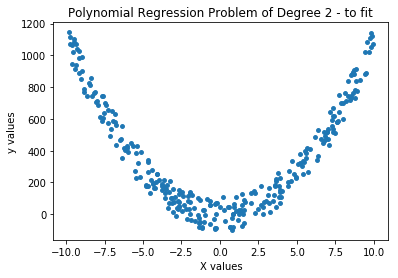

In [34]:
# Generating values 'X' and labels 'y'
X, y = generate_polynomial_regression_problem(DATA_NUM, DATA_DEGREE)

# Presenting generated data
plt.scatter(X, y, s=15)
plt.title("Polynomial Regression Problem of Degree 2 - to fit")
plt.xlabel("X values")
plt.ylabel("y values")
plt.show()

### Polynomial Regression - Raw implementation

In [35]:
class PolynomialRegression:
    """Polynomial Regression model.
    
    Arguments:
    ---------
    degree: int
        The power of the polynomial that should be used to fit data X.
    iterations: int
        Number of Gradient Descent Steps that will be performed in order to change weights of
        linear model
    learning_rate: float
        Weight applied for Gradient Descent Step during updating weights. (default: 0.001)
    normalize: boolean
        Flag for normalization. If set to true data will be scaled to values which mean is close
        to 0 and standard deviation close to 1. 
    verbose: boolean
        Flag for debugging. If set to true then error values achieved by model during training
        cycle will be displayed.
    """
    def __init__(self, degree, iterations, learning_rate=0.001, 
                 normalize=False, verbose=False):
        self.w = None
        self._normalize_mean = None
        self._normalize_std = None
        
        self.error_history = list()
        self.degree = degree
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.normalize = normalize
        self.verbose = verbose
        
        
    def fit(self, X, y):
        """Function that is adjusting Polynomial Regression Model weights 'w' to inserted data 'X'
        according to target values 'y'."""
        
        # Ensure data is float type
        X = X.astype(np.float32)
        y = y.astype(np.float32)
        
        if self.normalize:
            # Scaling X values
            self._normalize_mean = X.mean()
            self._normalize_std = X.std()
            X = self._normalize(X)
        
        # Insert bias and polynomial values
        X = np.column_stack([X**d for d in range(self.degree + 1)])
        
        # Creating weight for each feature in dataset
        self.w = np.zeros((X.shape[1], 1))
        
      # Updating weights by Gradient Descent
        for i in range(self.iterations):
            
            # Gradient step - Calculating gradient
            pred = np.dot(X, self.w)
            gradient = (1 / len(X)) * (np.dot(X.T, pred - y))
            
            # Gradient step - Updating weights
            self.w = self.w - self.learning_rate * gradient
            
            # Calculating error for new weights
            error = self._mse(X, y)
            self.error_history.append(error)
            
            # Displaying learning progress every 100 iterations
            if self.verbose and i % 100 == 0:
                print("Iteration no. " + str(i) + ", error: " + str(error))
    
    def _normalize(self, X):
        """Feature scaling for input matrix 'X' for avoiding gradient overflow."""
        return (X - self._normalize_mean) / self._normalize_std
        
        
    def _mse(self, X, y):
        """Implementation of Mean Squared Errors - cost function for monitoring how Polynomial Model
        is performing with current 'w' values"""
        
        # Calculating Mean Squared Error
        pred = np.dot(X, self.w)
        mean_square_error = (1 / (2 * len(X))) * np.sum(np.square(pred - y))
        
        return mean_square_error
                
    def predict(self, X):
        """Functions that takes feature values 'X' and returns predictions with usage of 
        current 'w' values"""
        
        # Ensure data is float type
        X = X.astype(np.float32)
        
        if self.normalize:
            # Scaling X values
            X = self._normalize(X)
            
        # Insert bias and polynomial values
        X = np.column_stack([X**d for d in range(self.degree + 1)])
        
        pred = np.dot(X, self.w)
        return pred
        

### Training model to fit generated data

Hyperparameters


In [36]:
iterations = 8000

Fitting to generated data

In [37]:
polynomial_regression_model = PolynomialRegression(DATA_DEGREE, iterations, normalize=True, verbose=True)
polynomial_regression_model.fit(X, y)

Iteration no. 0, error: 120703.780425
Iteration no. 100, error: 75835.2520405
Iteration no. 200, error: 48603.9737284
Iteration no. 300, error: 32028.0203952
Iteration no. 400, error: 21892.6657946
Iteration no. 500, error: 15653.4080572
Iteration no. 600, error: 11773.8755003
Iteration no. 700, error: 9326.20900648
Iteration no. 800, error: 7749.86505548
Iteration no. 900, error: 6706.03544234
Iteration no. 1000, error: 5989.77771219
Iteration no. 1100, error: 5476.9777661
Iteration no. 1200, error: 5092.33603811
Iteration no. 1300, error: 4790.04289924
Iteration no. 1400, error: 4542.11298637
Iteration no. 1500, error: 4331.34234407
Iteration no. 1600, error: 4147.05588251
Iteration no. 1700, error: 3982.53911129
Iteration no. 1800, error: 3833.48657126
Iteration no. 1900, error: 3697.0640268
Iteration no. 2000, error: 3571.34120882
Iteration no. 2100, error: 3454.9483063
Iteration no. 2200, error: 3346.86759245
Iteration no. 2300, error: 3246.30669352
Iteration no. 2400, error: 3152

Training results

In [38]:
# Trained weights of Polynomial Model of Degree 2 - w0 + w1 * x + w2 * x^2
print(polynomial_regression_model.w)

[[   8.89024662]
 [ -10.53708812]
 [ 352.16703531]]


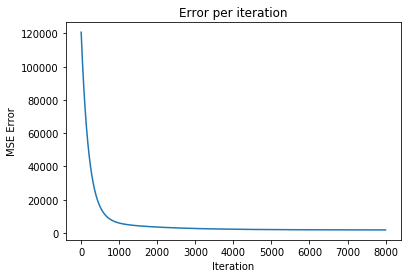

In [39]:
# Model learning history
plt.plot(polynomial_regression_model.error_history)
plt.title("Error per iteration")
plt.ylabel('MSE Error')
plt.xlabel('Iteration')
plt.show()

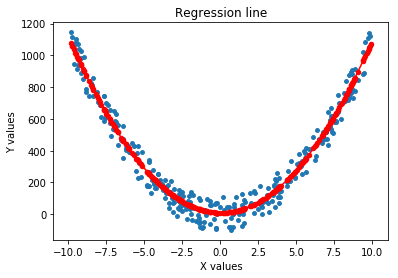

In [40]:
# Displaying dataset
plt.scatter(X, y, s=15)

# Displaying aproximated function
function_x = np.arange(np.min(X), np.max(X), 0.01).reshape(-1, 1)

plt.plot(function_x, polynomial_regression_model.predict(function_x), c="red")
plt.scatter(X, polynomial_regression_model.predict(X), s=20, c='red')

plt.title("Regression line")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.show()